In [108]:
from qiskit import *
import numpy as np



# follwoing the tutorial steps code:

# define the oracle circuit
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0,1)
oracle.to_gate()
# oracle.draw()

backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
# grover_circ.draw()

result = execute(grover_circ, backend).result()

sv = result.get_statevector()
np.around(sv,2)

reflection = QuantumCircuit(2, name = 'reflection')
reflection.h([0,1])
# flip the state of 00, to reflect the phase of the qubit 
reflection.z([0,1])
reflection.cz(0,1)

reflection.h([0,1])
reflection.to_gate()


# reflection.draw()

simulator = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1],[0,1])

grover_circ.draw()

result = execute(grover_circ, backend = simulator, shots = 1).result()
counts = result.get_counts(grover_circ)
print(counts)

{'11': 1}


In [109]:
#  my own code ( u (me) didnt see the original code, u made this from ur understanding, so be proud. ik you dont deserve but at least smile before u sleep, u might die while crying tonight...)

# winner state = 010

oracle = QuantumCircuit(3,name='oacle')
oracle.h([0,1,2])
oracle.cz(1,0)
oracle.cz(1,2)
oracle.to_gate()
oracle.draw()

┌───┐      
q_0: ┤ H ├─■────
     ├───┤ │    
q_1: ┤ H ├─■──■─
     ├───┤    │ 
q_2: ┤ H ├────■─
     └───┘

In [110]:
grover_sad = QuantumCircuit(3,3)
grover_sad.h([0,1,2])
grover_sad.append(oracle,[0,1,2])
grover_sad.draw()

┌───┐┌────────┐
q_0: ┤ H ├┤0       ├
     ├───┤│        │
q_1: ┤ H ├┤1 oacle ├
     ├───┤│        │
q_2: ┤ H ├┤2       ├
     └───┘└────────┘
c_0: ═══════════════
                    
c_1: ═══════════════
                    
c_2: ═══════════════

In [111]:
# reflectiom
reflection = QuantumCircuit(3, name = 'reflection')
reflection.h([0,1,2])

# reflect the winning state
reflection.z([1])
reflection.cz(0,1)

grover_sad.append(reflection,[0,1,2])
grover_sad.draw()

┌───┐┌────────┐┌─────────────┐
q_0: ┤ H ├┤0       ├┤0            ├
     ├───┤│        ││             │
q_1: ┤ H ├┤1 oacle ├┤1 reflection ├
     ├───┤│        ││             │
q_2: ┤ H ├┤2       ├┤2            ├
     └───┘└────────┘└─────────────┘
c_0: ══════════════════════════════
                                   
c_1: ══════════════════════════════
                                   
c_2: ══════════════════════════════

In [112]:
grover_sad.measure([0,1,2], [0,1,2])
grover_sad.draw()

┌───┐┌────────┐┌─────────────┐┌─┐      
q_0: ┤ H ├┤0       ├┤0            ├┤M├──────
     ├───┤│        ││             │└╥┘┌─┐   
q_1: ┤ H ├┤1 oacle ├┤1 reflection ├─╫─┤M├───
     ├───┤│        ││             │ ║ └╥┘┌─┐
q_2: ┤ H ├┤2       ├┤2            ├─╫──╫─┤M├
     └───┘└────────┘└─────────────┘ ║  ║ └╥┘
c_0: ═══════════════════════════════╩══╬══╬═
                                       ║  ║ 
c_1: ══════════════════════════════════╩══╬═
                                          ║ 
c_2: ═════════════════════════════════════╩═

In [113]:
simulator = Aer.get_backend('qasm_simulator')
depression = execute(grover_sad, backend = simulator, shots = 100).result()
tears = depression.get_counts(grover_sad)
print(tears)

{'011': 10, '110': 8, '010': 18, '000': 15, '100': 16, '111': 13, '101': 10, '001': 10}


In [114]:
# IT WOKRED!!!!!! WEEEEEEEEEEEEE, okay, enough happiness for tonight.

In [115]:
# i told u, ur happiness never ends with a good result. try again failure

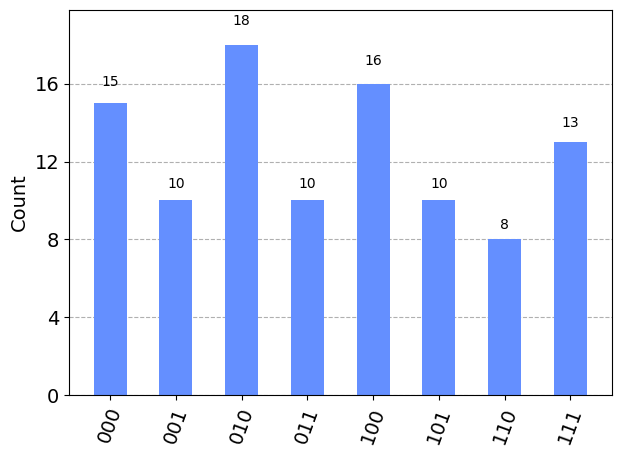

In [116]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(depression.get_counts(grover_sad))